# Исследование рынка заведений общественного питания Москвы

В нашем распоряжении датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

Необходимо изучить предоставленные данные, найти интересные закономерности и особенности рынка, которые помогут инвесторам определиться с дальнейшим выбором.

Файл moscow_places.csv содержит следующие данные:
 - name — название заведения;
 - address — адрес заведения;
 - category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
 - hours — информация о днях и часах работы;
 - lat — широта географической точки, в которой находится заведение;
 - lng — долгота географической точки, в которой находится заведение;
 - rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
 - price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
 - avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
 - middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
 - middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
 - chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): 0 — заведение не является сетевым, 1 — заведение является сетевым
 - district — административный район, в котором находится заведение, например Центральный административный округ;
 - seats — количество посадочных мест.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from folium import Map, Choropleth, Marker
import json
from folium.plugins import MarkerCluster

In [2]:
plt.style.use('bmh') 

In [3]:
import plotly.io as pio

## Знакмоство с данными

In [4]:
try:
    moscow_places = pd.read_csv('moscow_places.csv')
except:
    moscow_places = pd.read_csv('/datasets/moscow_places.csv')

In [5]:
moscow_places

name  category  \
0                   WoWфли      кафе   
1           Четыре комнаты  ресторан   
2                    Хазри      кафе   
3     Dormouse Coffee Shop   кофейня   
4                Иль Марко  пиццерия   
...                    ...       ...   
8401            Суши Мания      кафе   
8402             Миславнес      кафе   
8403               Самовар      кафе   
8404          Чайхана Sabr      кафе   
8405            Kebab Time      кафе   

                                         address  \
0                     Москва, улица Дыбенко, 7/1   
1             Москва, улица Дыбенко, 36, корп. 1   
2                 Москва, Клязьминская улица, 15   
3            Москва, улица Маршала Федоренко, 12   
4                Москва, Правобережная улица, 1Б   
...                                          ...   
8401               Москва, Профсоюзная улица, 56   
8402  Москва, Пролетарский проспект, 19, корп. 1   
8403      Москва, Люблинская улица, 112А, стр. 1   
8404      Москва, Люблинская улица, 112А, стр. 1   
8405              Москва, Россошанский проезд, 6   

                                  district  \
0          Северный административный округ   
1          Северный административный округ   
2          Северный административный округ   
3          Северный административный округ   
4          Северный административный округ   
...                                    ...   
8401   Юго-Западный административный округ   
8402          Южный административный округ   
8403  Юго-Восточный административный округ   
8404  Юго-Восточный административный округ   
8405          Южный административный округ   

                                                  hours        lat        lng  \
0                                ежедневно, 10:00–22:00  55.878494  37.478860   
1                                ежедневно, 10:00–22:00  55.875801  37.484479   
2     пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                                ежедневно, 09:00–22:00  55.881608  37.488860   
4                                ежедневно, 10:00–22:00  55.881166  37.449357   
...                                                 ...        ...        ...   
8401                             ежедневно, 09:00–02:00  55.670021  37.552480   
8402                             ежедневно, 08:00–22:00  55.640875  37.656553   
8403                           ежедневно, круглосуточно  55.648859  37.743219   
8404                           ежедневно, круглосуточно  55.648849  37.743222   
8405                           ежедневно, круглосуточно  55.598229  37.604702   

      rating          price                       avg_bill  middle_avg_bill  \
0        5.0            NaN                            NaN              NaN   
1        4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2        4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3        5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4        5.0        средние         Средний счёт:400–600 ₽            500.0   
...      ...            ...                            ...              ...   
8401     4.4            NaN                            NaN              NaN   
8402     4.8            NaN                            NaN              NaN   
8403     3.9            NaN          Средний счёт:от 150 ₽            150.0   
8404     4.2            NaN                            NaN              NaN   
8405     3.9            NaN                            NaN              NaN   

      middle_coffee_cup  chain  seats  
0                   NaN      0    NaN  
1                   NaN      0    4.0  
2                   NaN      0   45.0  
3                 170.0      0    NaN  
4                   NaN      1  148.0  
...                 ...    ...    ...  
8401                NaN      0   86.0  
8402                NaN      0  150.0  
8403                NaN      0  150.0  
8404                NaN      1  150.0  
8

In [6]:
moscow_places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Вывод.** Перед нами данные о 8406 заведении. Среди них вероятнее всего есть сетевые, а также могут быть дубликаты. В данных есть пропуски. Очень много пропусков в столбце со средней стоимостью чашки кофе. Половина столбцов имеет символьный тип данных. Все типы данных столбцов соответсвуют содержимому.

## Предобработка данных

### Работа с дубликатами

In [7]:
# ищем дубликаты
moscow_places.duplicated().sum()

0

Явных дубликатов нет, однако на результат могло повлиять несколько факторов: названия и адреса написаны в разных регистрах, указаны разные режимы работы или из-за несоответсвия категорий.

In [8]:
moscow_places['name'] = moscow_places['name'].str.lower()
moscow_places['address'] = moscow_places['address'].str.lower()

moscow_places[moscow_places[['name', 'address']].duplicated()]

name  category  \
215                        кафе      кафе   
1511                  more poke  ресторан   
2420  раковарня клешни и хвосты   бар,паб   
3109            хлеб да выпечка      кафе   

                                      address  \
215              москва, парк ангарские пруды   
1511  москва, волоколамское шоссе, 11, стр. 2   
2420               москва, проспект мира, 118   
3109              москва, ярцевская улица, 19   

                                     district  \
215           Северный административный округ   
1511          Северный административный округ   
2420  Северо-Восточный административный округ   
3109          Западный административный округ   

                                                  hours        lat        lng  \
215                              ежедневно, 10:00–22:00  55.881438  37.531848   
1511  пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...  55.806307  37.497566   
2420  пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...  55.810677  37.638379   
3109                                                NaN  55.738449  37.410937   

      rating price avg_bill  middle_avg_bill  middle_coffee_cup  chain  seats  
215      3.2   NaN      NaN              NaN                NaN      0    NaN  
1511     4.2   NaN      NaN              NaN                NaN      1  188.0  
2420     4.4   NaN      NaN              NaN                NaN      1  150.0  
3109     4.1   NaN      NaN              NaN                NaN      0  276.0

Заведений с названием `кафе` в парке в самом деле может быть несколько. Остальные адреса можно удалить как дубликаты.

In [9]:
moscow_places = moscow_places.drop([1511, 2420, 3109])

### Работа с пропусками

In [10]:
# ищем пропуски
moscow_places.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 535
lat                     0
lng                     0
rating                  0
price                5088
avg_bill             4587
middle_avg_bill      5254
middle_coffee_cup    7868
chain                   0
seats                3611
dtype: int64

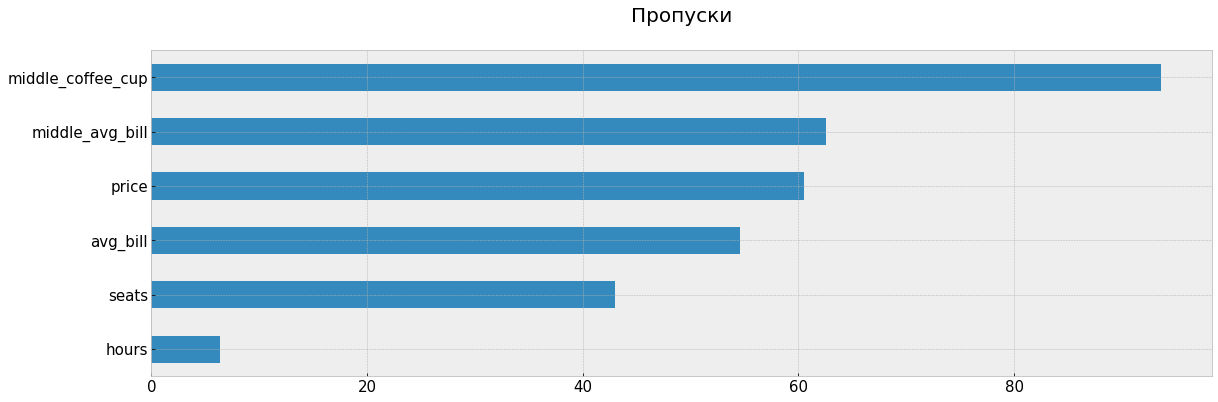

In [11]:
((moscow_places.isna().mean() * 100).to_frame() # строим таблицу с процентами пропусков данных по столбцам
 .rename(columns = {0:'space'})
 .query('space > 0') # оставляем только те столбцы, где есть пропуски
 .sort_values('space')
 .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 15) # визуализируем полученную таблицу
 .set_title('Пропуски' + "\n", fontsize = 20)    
);

Пропусков таблице очень много, однако их наличие неизбежно из-за способа заполнения таких столбцов как `middle_coffee_cup` и  `middle_avg_bill`. Ведь они основываются на одном из трех возможных значений столбца `avg_bill`.

Пропуски в `price` можно попробовать восполнить на основе данных по среднему чеку или, если заведение сетевое, на основе данных других филиалов.

In [12]:
moscow_places.groupby('price').agg({'middle_avg_bill': ['min', 'max']})

middle_avg_bill         
                          min      max
price                                 
высокие                   0.0  35000.0
выше среднего           375.0   4500.0
низкие                   90.0    600.0
средние                 165.0   2150.0

In [13]:
for cat in moscow_places['category'].unique():
    print('Разброс средних цен в заведениях типа', cat)
    display(moscow_places
            .query('category == @cat')
            .pivot_table(index='price', values='middle_avg_bill', aggfunc=['min', 'max'])
           )
    print()

Разброс средних цен в заведениях типа кафе


min             max
              middle_avg_bill middle_avg_bill
price                                        
высокие                 950.0          4500.0
выше среднего          1100.0          1700.0
низкие                  100.0           600.0
средние                 200.0          1750.0


Разброс средних цен в заведениях типа ресторан


min             max
              middle_avg_bill middle_avg_bill
price                                        
высокие                1000.0         35000.0
выше среднего           750.0          2250.0
низкие                  120.0           575.0
средние                 200.0          2150.0


Разброс средних цен в заведениях типа кофейня


min             max
              middle_avg_bill middle_avg_bill
price                                        
высокие                   0.0          2500.0
выше среднего           700.0          2000.0
низкие                  120.0           325.0
средние                 200.0          1100.0


Разброс средних цен в заведениях типа пиццерия


min             max
              middle_avg_bill middle_avg_bill
price                                        
высокие                1650.0          3000.0
выше среднего          1000.0          2000.0
низкие                  150.0           300.0
средние                 199.0          1250.0


Разброс средних цен в заведениях типа бар,паб


min             max
              middle_avg_bill middle_avg_bill
price                                        
высокие                1750.0         11000.0
выше среднего           375.0          4500.0
низкие                  150.0           190.0
средние                 165.0          1250.0


Разброс средних цен в заведениях типа быстрое питание


min             max
              middle_avg_bill middle_avg_bill
price                                        
высокие                2750.0          5500.0
выше среднего          1200.0          1500.0
низкие                   90.0           225.0
средние                 200.0          1100.0


Разброс средних цен в заведениях типа булочная


min             max
              middle_avg_bill middle_avg_bill
price                                        
высокие                1750.0          2500.0
выше среднего           500.0          1250.0
низкие                  150.0           200.0
средние                 200.0          1000.0


Разброс средних цен в заведениях типа столовая


min             max
              middle_avg_bill middle_avg_bill
price                                        
высокие                3750.0          3750.0
выше среднего          1200.0          1250.0
низкие                  125.0           265.0
средние                 195.0          1000.0

In [14]:
(
    moscow_places
    .query('chain == 1')
    .pivot_table(index='name', values='price', aggfunc='nunique')
    .sort_values(by='price', ascending=False)
)

price
name                  
мимино               3
шоколадница          3
одесса-мама          3
чайхана              3
крошка картошка      3
...                ...
мельница             0
маяк                 0
sub cafe             0
suшi                 0
1-я креветочная      0

[747 rows x 1 columns]

Разброс цен внутри категорий достаточно большой. При среднем счете в 500 рублей заведение может попасть сразу во все категории. Даже разделив заведения по типу, границы между категориями остаются размытыми. А для одной сети заведения могут сразу относиться к трем ценновым категориям.

Очень странно выглядит средний чек 0 рублей.

In [15]:
moscow_places.query('middle_avg_bill == 0')

name category                        address  \
3688  кофемания  кофейня  москва, улица новый арбат, 19   

                                district                     hours        lat  \
3688  Центральный административный округ  ежедневно, круглосуточно  55.752136   

            lng  rating    price             avg_bill  middle_avg_bill  \
3688  37.587784     4.5  высокие  Средний счёт:от 0 ₽              0.0   

      middle_coffee_cup  chain  seats  
3688                NaN      1  200.0

In [16]:
moscow_places.loc[moscow_places['middle_avg_bill'] == 0, 'middle_avg_bill'] = np.NaN

Хоть нулевой чек и один, на всякий случай заменим его пропуском, чтобы в дальнейшем он не перекашивал средний показатель сети, категории или района.

### Добавление столбцов

In [17]:
# вынесем название улиц в отдельный столбец
moscow_places['street'] = [addr[1] for addr in moscow_places['address'].str.split(',')]

In [18]:
# обозначим является ли заведение круглосуточным
moscow_places['is_24/7'] = np.where(moscow_places['hours']=='ежедневно, круглосуточно', True, False)

**Вывод.** Абсолютно идентичных записей в таблице нет, однако присутсвуют записи-дубликаты с разным режимом и/или чуть другими координатами. В таблице много пропусков. Больше половины данных отсутсвует в столбцах про ценовую категорию зведения. Есть небольшое число пропусков в столбцах с режимом работы и числом посадочных мест.

В результате предобработки все найденные дубликаты были убраны. Добавлены столбцы: с информацией об улице (шоссе / проспекте / переулке) и проверкой на круглосуточность заведения.

Среди странностей было замечено заведение, которое имеет высокие цены, однако средний чек составляет 0 рублей. Также было замеченно, что в одной сети заведения могут относиться к нескольким категориям по ценнам. Да и в целом, деление на ценновые категории достаточное размыто.

## Анализ данных

Для выявления интересных деталей в данных, необходимо рассмотреть их в разных разрезах.

Для начала узнаем, как много представителей разных категорий и какие вообще категории общепита есть в Москве.

In [19]:
moscow_places['category'].value_counts()

кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

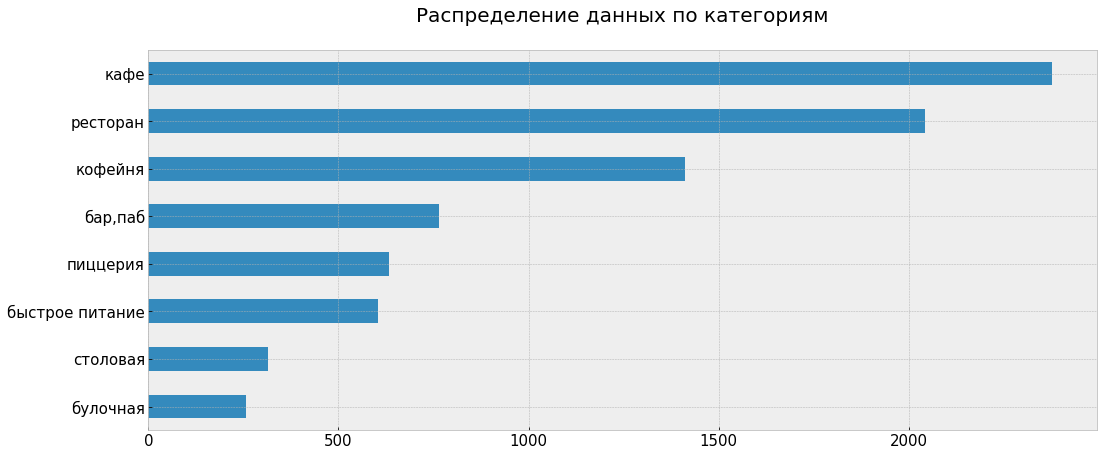

In [20]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.grid()
ax.set_title('Распределение данных по категориям' + '\n', fontsize = 20)
moscow_places['category'].value_counts().sort_values().plot(kind='barh', ax=ax, grid=True, fontsize=15)
plt.show()

Три кита заведений общепита в Москве - это кафе, рестораны и кофейни - количество заведений каждого типа значительно превышает 1000 единиц. Меньше всего распространены столовые и булочные.

Теперь посмотрим, как меняется число посадочных мест в зависимости от категории заведения.

In [21]:
piv_table = moscow_places.groupby('category').agg({'seats': ['min', 'mean', 'median', 'max']})
piv_table

seats                           
                  min        mean median     max
category                                        
бар,паб           0.0  124.477516   82.0  1288.0
булочная          0.0   89.385135   50.0   625.0
быстрое питание   0.0   98.891117   65.0  1040.0
кафе              0.0   97.365653   60.0  1288.0
кофейня           0.0  111.199734   80.0  1288.0
пиццерия          0.0   94.496487   55.0  1288.0
ресторан          0.0  121.892041   86.0  1288.0
столовая          0.0   99.750000   75.5  1200.0

Экстремальные значения по посадочным местам выглядят нереалистичными. Минимум еще можно объяснить - заведение может располагаться на фудкорте, где посадочные места не относяться ни к одному из заведений. Однако представить пиццерию или любое другое заведение более чем с 500 посадочными местами сложно.

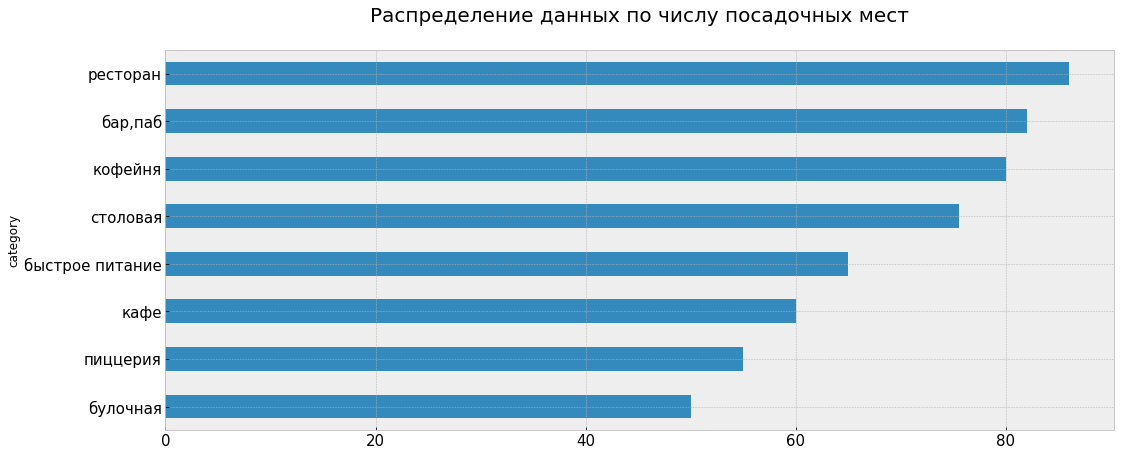

In [22]:
piv_table.columns = ['min', 'mean', 'median', 'max']

fig, ax = plt.subplots(figsize=(17, 7))
ax.grid()
ax.set_title('Распределение данных по числу посадочных мест' + '\n', fontsize = 20)
piv_table['median'].sort_values().plot(kind='barh', ax=ax, grid=True, fontsize=15)
plt.show()

Медианное значение во всех заведениях достаточно близко. Больше всего посадочных мест в ресторанах, что на мой вгляд логично. Меньше всего людей вмещают булочные.

Узнаем, соотношение сетевых и несетевых заведений в Москве.

In [23]:
is_chain = moscow_places['chain'].value_counts().to_list()
is_chain

[5200, 3203]

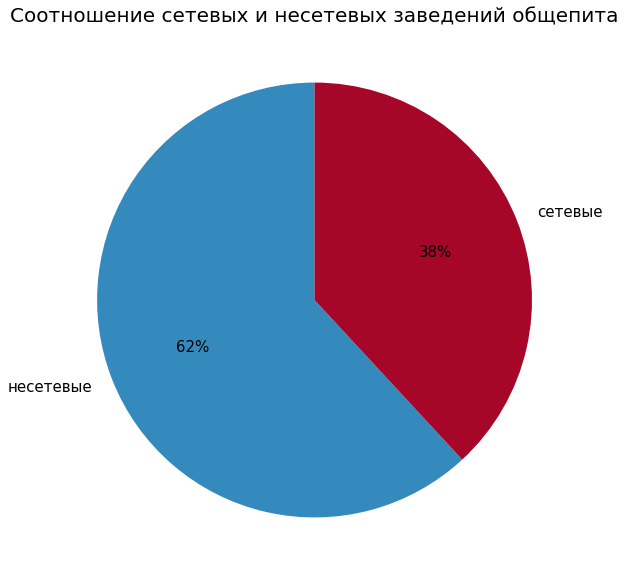

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Соотношение сетевых и несетевых заведений общепита', fontsize = 20)
plt.pie(labels=['несетевые', 'сетевые'], x=is_chain, autopct = '%0.0f%%', startangle = 90, textprops={'fontsize': 15})
plt.show()

Несетевых заведений значительно больше. Однако данные о том, является ли заведение сетевым могут быть неточными для маленьких сетей.

Посмотрим, какие заведения чаще всего становятся сетевыми.

In [25]:
moscow_places.query('chain == 1')['category'].value_counts()

кафе               779
ресторан           729
кофейня            720
пиццерия           330
быстрое питание    232
бар,паб            168
булочная           157
столовая            88
Name: category, dtype: int64

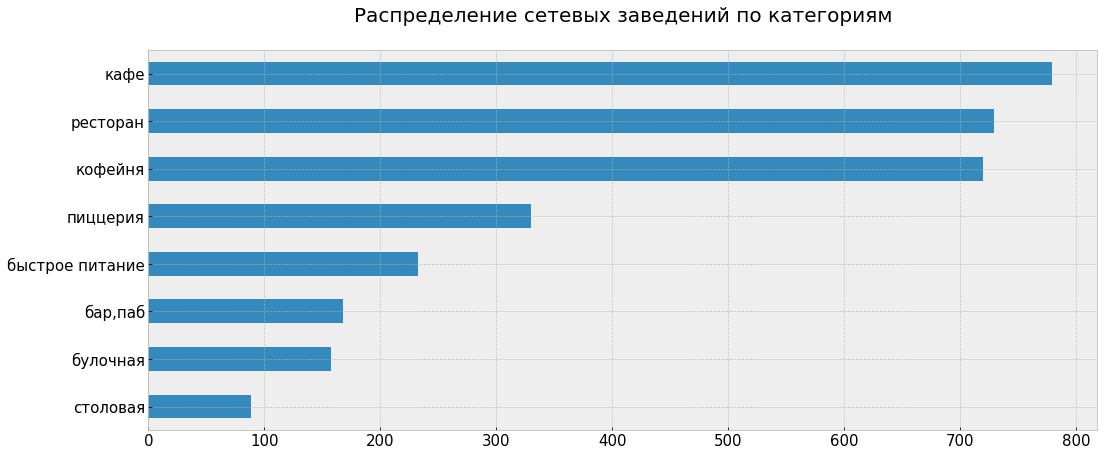

In [26]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.grid()
ax.set_title('Распределение сетевых заведений по категориям' + '\n', fontsize = 20)
moscow_places.query('chain == 1')['category'].value_counts().sort_values().plot(kind='barh', ax=ax, grid=True, fontsize=15)
plt.show()

Чаще всего сетевыми сьановятся кафе рестораны и кофейни, однако данных заведений в принципе больше в Москве. Рассмотрим относительные данные.

In [27]:
all_category = moscow_places['category'].value_counts()
chain_category = moscow_places.query('chain == 1')['category'].value_counts()

table = pd.concat([all_category, chain_category], axis=1)
table.columns = ['total_count', 'chain_count']
table['share'] = table['chain_count'] / table['total_count']
table

total_count  chain_count     share
кафе                    2377          779  0.327724
ресторан                2042          729  0.357003
кофейня                 1413          720  0.509554
бар,паб                  764          168  0.219895
пиццерия                 633          330  0.521327
быстрое питание          603          232  0.384743
столовая                 315           88  0.279365
булочная                 256          157  0.613281

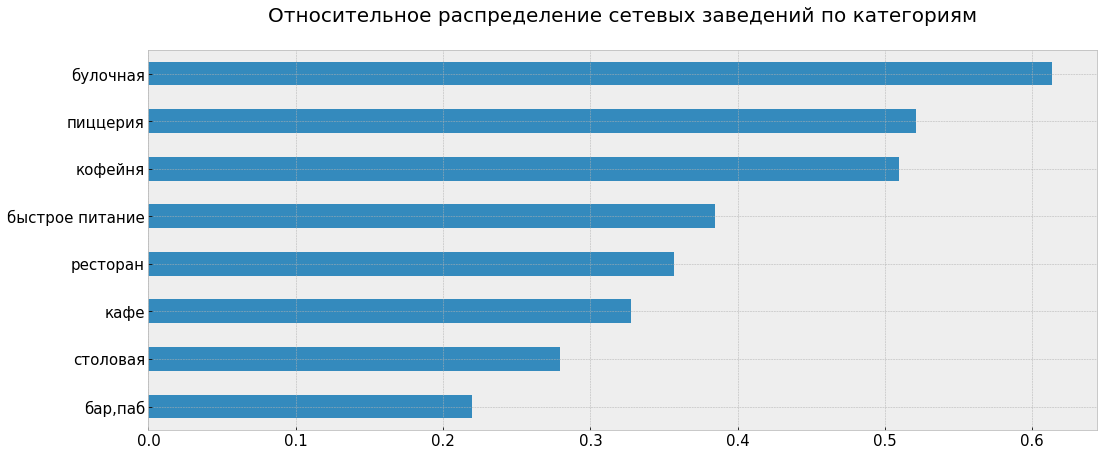

In [28]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.grid()
ax.set_title('Относительное распределение сетевых заведений по категориям' + '\n', fontsize = 20)
table['share'].sort_values().plot(kind='barh', ax=ax, grid=True, fontsize=15)
plt.show()

С относительными данными картина совсем изменилась. Оказывается более 60% булочных в Москве - сетевые. Также больше половины пиццерий и кофейнь - сетевые. Меньше всего сетевых заведений категории бар/паб - чуть больше 20%.

Найдем ТОП-15 сетевых заведений по числу представителей.

In [29]:
moscow_places.query('chain == 1')['name'].value_counts().head(15)

шоколадница                            120
домино'с пицца                          76
додо пицца                              74
one price coffee                        71
яндекс лавка                            69
cofix                                   65
prime                                   50
хинкальная                              44
кофепорт                                42
кулинарная лавка братьев караваевых     39
теремок                                 38
чайхана                                 37
cofefest                                32
буханка                                 32
му-му                                   27
Name: name, dtype: int64

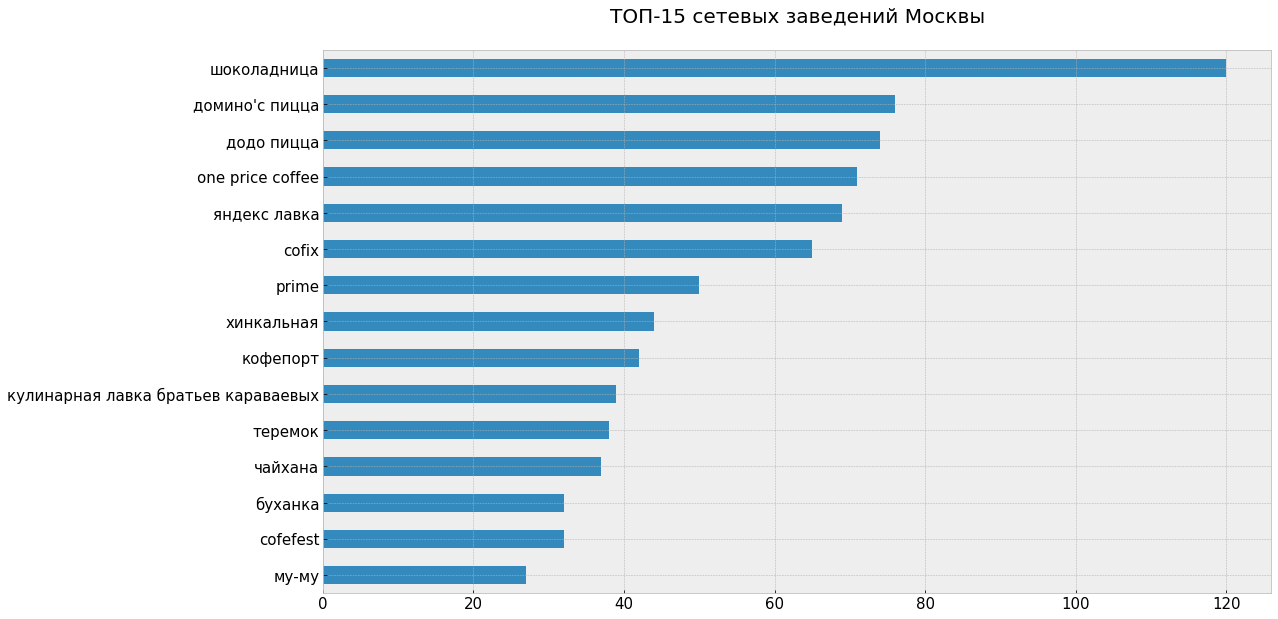

In [30]:
fig, ax = plt.subplots(figsize=(17, 10))
ax.grid()
ax.set_title('ТОП-15 сетевых заведений Москвы' + '\n', fontsize = 20)
(
    moscow_places
    .query('chain == 1')['name']
    .value_counts()
    .head(15)
    .sort_values()
    .plot(kind='barh', ax=ax, grid=True, fontsize=15)
)
plt.show()

Почти все заведения из ТОПа мне знакомы. В основном это представители кофейнь, но также есть представители других категорий. Странно, что заведений быстрого питания не так много.

Посмотрим, какие административные районы Москвы есть в данных. И как распределены заведения разных категорий по этим округам.

In [31]:
moscow_places['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

In [32]:
moscow_places.pivot_table(index='district', columns='category', values='name', aggfunc='count')

category                                 бар,паб  булочная  быстрое питание  \
district                                                                      
Восточный административный округ              53        25               71   
Западный административный округ               50        37               62   
Северный административный округ               68        39               58   
Северо-Восточный административный округ       62        28               82   
Северо-Западный административный округ        23        12               30   
Центральный административный округ           364        50               87   
Юго-Восточный административный округ          38        13               67   
Юго-Западный административный округ           38        27               61   
Южный административный округ                  68        25               85   

category                                 кафе  кофейня  пиццерия  ресторан  \
district                                                                     
Восточный административный округ          272      105        72       160   
Западный административный округ           238      150        71       218   
Северный административный округ           235      193        77       188   
Северо-Восточный административный округ   269      159        68       182   
Северо-Западный административный округ    115       62        40       109   
Центральный административный округ        464      428       113       670   
Юго-Восточный административный округ      282       89        55       145   
Юго-Западный административный округ       238       96        64       168   
Южный административный округ              264      131        73       202   

category                                 столовая  
district                                           
Восточный административный округ               40  
Западный административный округ                24  
Северный административный округ                41  
Северо-Восточный административный округ        40  
Северо-Западный административный округ         18  
Центральный административный округ             66  
Юго-Восточный административный округ           25  
Юго-Западный административный округ            17  
Южный административный округ                   44

In [ ]:
data = (
    moscow_places
    .groupby(['district', 'category'], as_index=False)
    .agg({'name': 'count'})
    .rename(columns={'name': 'count'})
)

fig = px.sunburst(data,
                  path=['district', 'category'],
                  values='count',
                  #color='category',
                  width=900, height=800,
                  title='Соотношение представителей общепита разных категорий по округам',
                 )
fig.update_traces(textinfo='label+percent entry')
fig.update_layout(font=dict(size=15))
fig.show(renderer="png", width=700, height=700, scale=1.2)

C:\Users\USER\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
C:\Users\USER\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


Больше всего заведений общепита расположено в центе - более 2 тысяч единиц. В остальных же округах данные распределены более менее равномерно. Выделяется СЗАО, в котором данных значительно меньше, чем в других районах. Возможно, у нас неполные данные, или же район имеет какие-то особенности.
Интересно заметить, что во всех районах,  первое место по числу заведений занимает категория "кафе", кроме центрального, в котором это место заняла категория "ресторан".

Посмотрим, какие категории общепита в среднем получают более высокие оценки.

In [ ]:
moscow_places.groupby('category', as_index=False)['rating'].agg('median').sort_values(by='rating', ascending=False)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.grid()
ax.set_title('Распределение оценок заведений общепита в зависимости от категории' + '\n', fontsize = 20)
(sns.boxplot(x='rating',
             y='category',
             data=moscow_places,
             order=['бар,паб', 'булочная', 'кофейня', 'пиццерия', 'ресторан', 'столовая', 'быстрое питание', 'кафе'])
)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.grid()
ax.set_title('Распределение средних оценок заведений общепита в зависимости от категории' + '\n', fontsize = 20)
(
    moscow_places
    .groupby('category')['rating']
    .agg('median')
    .sort_values(ascending=False)
    .plot(kind='bar', ylim=[4.0, 4.5], ax=ax, rot=-30, fontsize=15)
)
plt.show()

Как видно из графика, средние оценки всех категорий достаточно близки и расположены между 4.0 и 4.5. Однако с уверенностью можно сказать, что заведения категории "бар, паб" в среднем получают более высокие оценки. А вот заведения быстрого питания в среднем получают более низкие оценки. У категории "кафе" самый масштабный разброс оценок - усы графика раскинулись от 3.4 до 5.0.

А теперь посмотрим, как распределены оценки по административным округам.

In [ ]:
# загружаем JSON-файл с границами округов Москвы
with open('admin_level_geomap.geojson', encoding='utf-8') as f:
    geo_json = json.load(f)
state_geo = 'admin_level_geomap.geojson'
    
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
rating_df = moscow_places.groupby('district', as_index=False)['rating'].agg('median')

Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

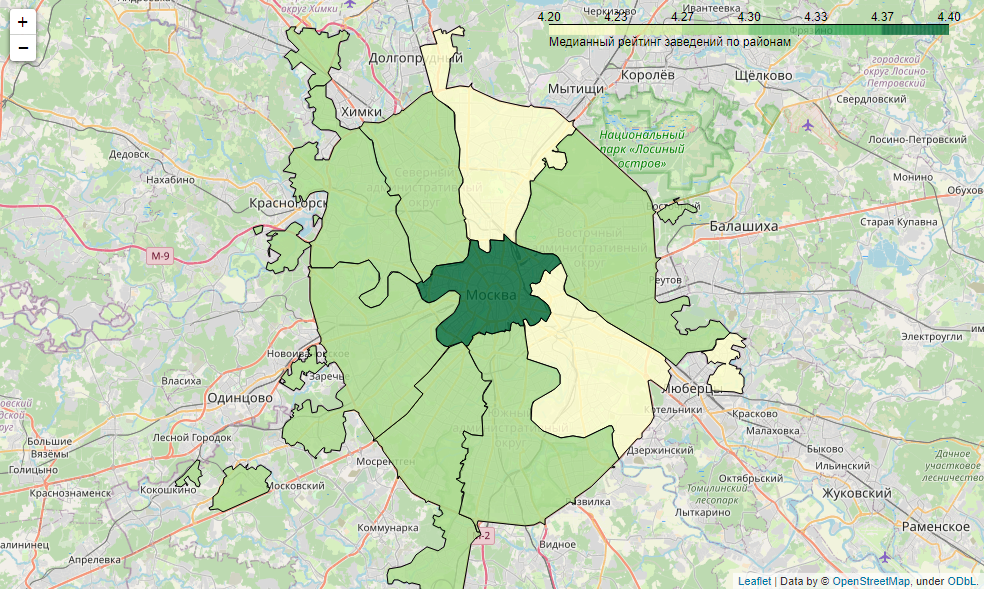

В центре самые высокие средние оценки. В остальных районах оценки примерно одинаковые. Выделяется два округа - СВАО и ЮВАО - здесь оценки ниже, чем в остальных АО.

Отобразим все наши заведения на карте.

In [ ]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
moscow_places.apply(create_clusters, axis=1)

# выводим карту
m

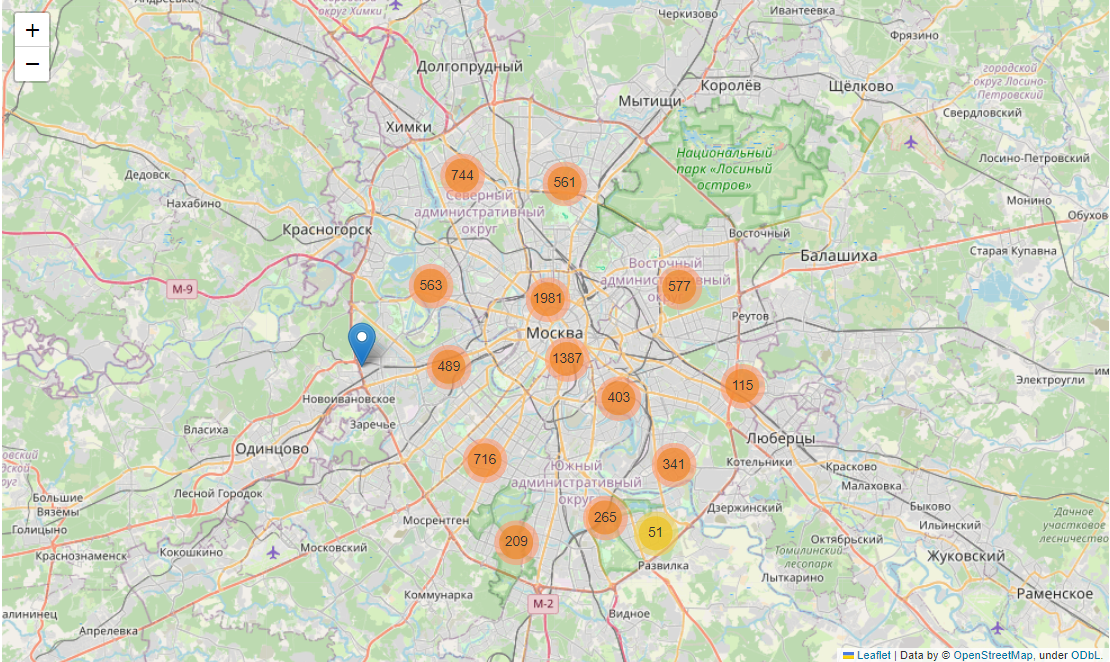

Найдем топ-15 улиц, где расположено больше всего заведений обществого питания.

In [ ]:
# сгруппируем данные по улицам и посчитаем, сколько заведений расположилось на каждой из них
data_per_streets = (
    moscow_places
    .groupby('street', as_index=False)['name']
    .agg('count')
    .rename(columns={'name': 'places_count'})
    .sort_values(by='places_count', ascending=False)
)

# выберем топ-15 по количеству заведений и преобразуем данные в список
top_streets = data_per_streets.head(15)
top_streets_list = top_streets['street'].to_list()
top_streets_list

In [ ]:
(
    moscow_places
    .query('street in @top_streets_list')
    .pivot_table(index='street', columns='category', values='name', aggfunc='count')
)

In [ ]:
# составим сводную таблицу для графика
data = (
    moscow_places
    .query('street in @top_streets_list')
    .groupby(['street', 'category'], as_index=False)
    .agg({'name': 'count'})
    .rename(columns={'name': 'count'})
)

# визуализируем какие категории общепита есть на каждой из улице и какую долю они составляют
fig = px.sunburst(data,
                  path=['street', 'category'],
                  values='count',
                  #color='category',
                  width=900, height=800,
                  title='Соотношение представителей общепита разных категорий на самых популярных улицах'
                 )
fig.update_traces(textinfo='label+percent entry')
fig.update_layout(font=dict(size=15))
fig.show(renderer="png", width=700, height=700, scale=1.2)

В топ-15 в основном входят "большие улицы" - шоссе, проспекты и даже мкад. Среди всех улиц сильно выделяется Проспект Мира, на котором прмерно в 2 раза больше заведений, чем на остальных.
Среди категорий преобладают рестораны и кафе. Есть категории, которые присутсвуют не на всех топовых улицах: булочные, пиццерии, столовые.

In [ ]:
one_place_street = data_per_streets.query('places_count == 1')['street'].to_list()
one_place_street

In [ ]:
moscow_places.query('street in @one_place_street').describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

In [ ]:
(
    moscow_places
    .query('street in @one_place_street')
    .pivot_table(index='district', columns='category', values='name', aggfunc='count')
)

Улиц, где расположено лишь одно заведение много, а заведения на них самые различные. Однако можно заметить, что большинство кафе, кофейнь, баров/пабов и ресторанов расположено в центре.

Проанализируем цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?

In [ ]:
# загружаем JSON-файл с границами округов Москвы
with open('admin_level_geomap.geojson', encoding='utf-8') as f:
    geo_json = json.load(f)
state_geo = 'admin_level_geomap.geojson'
    
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
rating_df = moscow_places.groupby('district', as_index=False)['middle_avg_bill'].agg('median')

Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный средний счет в заведениях по районам',
).add_to(m)

# выводим карту
m

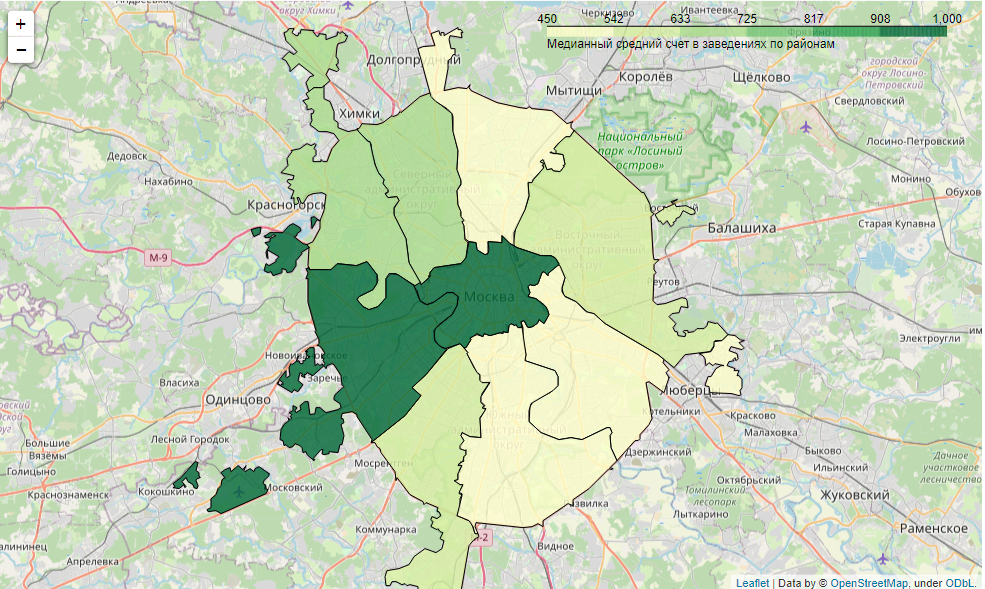

Как видно из фонограмы, в центре и на западе Москвы медианное значение среднего счета выше, чем в других районах, и составляет примерно 1000 рублей. В остальных районах медианное колеблется между 450 и 725. То есть разница примерно в 2 раза. 

**Вывод.**

Проведя анализ рынка заведений общественного питания Москвы, мы получили следующие результаты:
 - Больше всего заведений общественного питания расположено в центре, там же более высокие средний чек и рейтинг,
 - Более высокие оценки в среднем имеют заведения категории бар/паб
 - Больше всего представителей в Москве имеют категории кафе, кофейни и рестораны
 - Больше половины заведений в Москве не являются сетевыми
 - В своей категории больший процент сетевых представителей имеют булочные, пиццерии и кофейни
 - Среди самых популярных заведений по числу представителей сети выделяются кофейни
 - В СЗАО очень мало заведений общепита по сравнению с другими районами
 - По своим показателям выделяется ЗАО, где заведений меньше, чем в половине округов, однако средний счет и оценки не уступают центральному округу

## Исследование кофеен Москвы

In [ ]:
coffeeshops = moscow_places.query('category == "кофейня"')
coffeeshops['name'].count()

Всего в датасете 1413 представителей кофеен Москвы.

In [ ]:
coffeeshops['district'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(17, 10))
ax.grid()
ax.set_title('Количество кофеен по округам' + '\n', fontsize = 20)
coffeeshops['district'].value_counts().plot(kind='bar', ax=ax, grid=True, fontsize=15)
plt.show()

Больше всего кофеен - более четверти - расположено в центре. Меньше всего расположено на северо-западе, однако там в целом значительно меньше представителей общепита, чем в других районах.

In [ ]:
coffeeshops['is_24/7'].value_counts()

In [ ]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=11)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
coffeeshops[coffeeshops['is_24/7'] == True].apply(create_clusters, axis=1)

# выводим карту
m

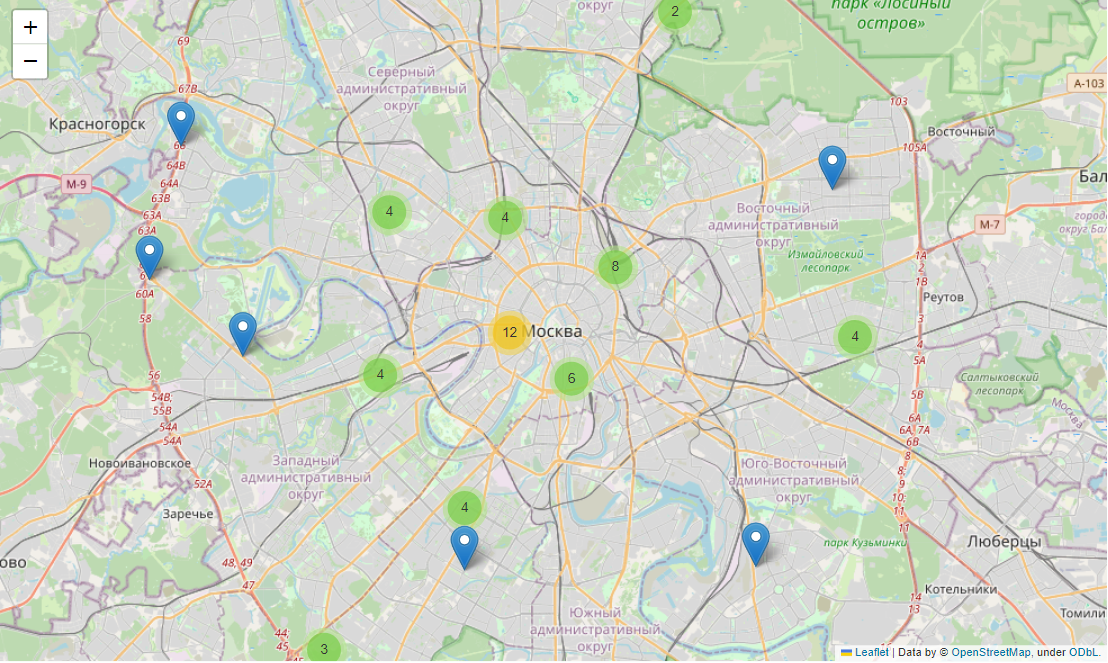

Среди кофеен есть круглосуточные, однако их очень мало - менее 5%. В основном такие кофейни расположены в центре.

In [ ]:
coffeeshops['rating'].value_counts()

In [ ]:
coffeeshops.groupby('district').agg({'rating': 'median'})

Оценки у кофеен самые различные: от 1.4 до 5.0, однако большинство заведений имеют оценки между 4.1 и 4.4. Рейтинг во всех округах в среднем одинаковый.

In [ ]:
coffeeshops['middle_coffee_cup'].describe()

Средний показатель средней стоимости чашки кофе расположен между 170 и 175. Для начинающей кофейни я не рекомендую ставить стоимость выше среднего показателя по району, где собирается открыться, чтобы выглядеть более привлекательной на фоне конкурентов.

In [ ]:
(
    coffeeshops
    .groupby('district')
    .agg({'middle_avg_bill': 'median', 'middle_coffee_cup': 'median'})
    .sort_values(by='middle_coffee_cup', ascending=False)
)

In [ ]:
# загружаем JSON-файл с границами округов Москвы
with open('admin_level_geomap.geojson', encoding='utf-8') as f:
    geo_json = json.load(f)
state_geo = 'admin_level_geomap.geojson'
    
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
rating_df = coffeeshops.groupby('district', as_index=False)['middle_coffee_cup'].agg('median')

Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'middle_coffee_cup'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средняя цена чашки кофе в кофейнях по районам',
).add_to(m)

# выводим карту
m

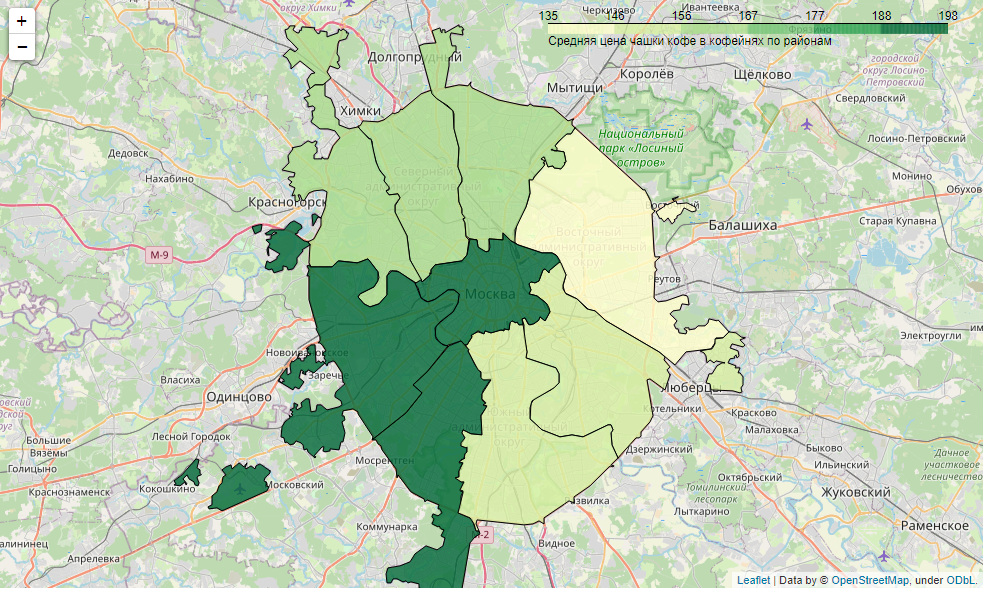

**Вывод.**

Для начинающей кофейни я бы рекомендовала открыться либо в центре, либо в каком-то большом торговом центре в других округах, например ЗАО. В центре будет очень высокий уровень конкуренции, но и вероятность быть замеченным выше. В ЗАО же уровень конкуренции будет значительно ниже, однако остальные показатели у кофеен высокие.

Если есть желание расти в сетевом плане, также советую открываться в центре, как мы видели на карте сетевых кофеен - основная их часть расположена именно там. Вероятно такое расположение более благоприятно.

При открытии стоит ориентироваться на средний показатель цен в районе. Однако я не советую поднимать стоимость кружки кофе сильно выше 175 рублей, что является средним показателем по Москве.



Презентация: <https://disk.yandex.ru/d/Em6R39y2OXDtfA>